# Team 13 Project 3 - Lung Cancer Subtyping
## Members:

- Rodolfo Ismael Cabrera Silva
- Vital Innocent Nyabashi
- Garrett Hill

# Vital Nyabashi
### What was your biggest challenge in this project?
My biggest challenge was training the model on half of the data and making sure the split didn’t break the code or cause errors when fitting the model.
### What did you learn while working on this project?
I learned how to properly split a dataset, train a model on only part of the data, and understand why training and testing on separate sets is important.
### If you had more time on the project what other question(s) would you like to answer?
If I had more time, I would try different training/test splits or compare multiple models to see which one performs best.


### Garrett Hill Questions 
### What was your biggest challenge in this project?
My biggest challenge in this project was navigating the arguments during the KMeans clustering and knowing when to use the proper functions. For example, using kmeans.fit_predict vs kmeans.predict vs kmeans.fit when training on one half of the data and predicting the other half or fitting and predicting on the entire data set. Knowing when to use which approach and how to actually translate into code was confusing for me.
### What did you learn while working on this project?
I learned about how clustering is actually performed using KMeans and how it can be used with a classic approach of splitting the data, training on one half and evaluating on the other.
### If you had more time on the project what other question(s) would you like to answer? 
I would like to compare this method of clustering to other methods. Do other methods cluster with higher accuracy? Does this come at the tradeoff of more intense processing/longer runtimes? These are the questions I would explore if I had more time to investigate these alteratives. 

# Part 1 Rodolfo Ismael Cabrera Silva

### What was your biggest challenge in this project?

Understand the class GEOparse.GEOTypes.GSE and where the data is located and how to extract it.

### What did you learn while working on this project?

I learned how to use the GEOparse package and got a better understanding on how to make the datasets needed for scikit learning models.

### If you had more time on the project what other question(s) would you like to answer? 

I would like to create a Class Object with the required methods to get the information with GEOparse and edit the data.

In [1]:
# Importing necessary libraries
# Geoparse: Module to automatically download GEO datasets and parse them into pandas DataFrames for easy manipulation.
# Pandas: For data manipulation and analysis, providing data structures like DataFrames. Dependency for GEOparse.
# NumPy: For numerical operations to use alongside with pandas DataFrames.
# Sklearn: For machine learning tasks including data preprocessing, clustering algorithms, and evaluation metrics. 
# Importing only the required components from sklearn: KMeans for clustering, and accuracy_score for evaluating model performance.
# Matplotlib: For data visualization to create plots and graphs.
import GEOparse as geo
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# GEOparse does not provide a dtype when runing pandas read_csv. Also, GEOparse does not allow the *args **kwargs to populate the internal function.
# Ignoring the DtypeWarning error.
# Warning returns:
# Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
import warnings
warnings.filterwarnings('ignore', category=pd.errors.DtypeWarning)


In [2]:
# Downloading GEO soft file in current location
geo_df = geo.get_GEO(geo="GSE10245",  
                     silent = True
                    )

geo_df
type(geo_df)

GEOparse.GEOTypes.GSE

In [3]:
# Checking Metadata Information
metadata = geo_df.phenotype_data

metadata.head(5) # Column "title" has the cancer information but needs to be extracted

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,contact_department,contact_institute,contact_address,contact_city,contact_zip/postal_code,contact_country,supplementary_file,relation,series_id,data_row_count
GSM258551,NSCLC_AC_10,GSM258551,Public on Oct 01 2009,Jan 23 2008,Aug 28 2018,RNA,1,human non-small cell lung cancer tumor tissue,Homo sapiens,9606,...,Molecular Genetics,German Cancer Research Center and National Cen...,Im Neuenheimer Feld 460,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM258n...,"Reanalyzed by: GSE60486,Reanalyzed by: GSE119087",GSE10245,54675
GSM258552,NSCLC_AC_16,GSM258552,Public on Oct 01 2009,Jan 23 2008,Aug 28 2018,RNA,1,human non-small cell lung cancer tumor tissue,Homo sapiens,9606,...,Molecular Genetics,German Cancer Research Center and National Cen...,Im Neuenheimer Feld 460,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM258n...,"Reanalyzed by: GSE60486,Reanalyzed by: GSE119087",GSE10245,54675
GSM258553,NSCLC_SCC_22,GSM258553,Public on Oct 01 2009,Jan 23 2008,Aug 28 2018,RNA,1,human non-small cell lung cancer tumor tissue,Homo sapiens,9606,...,Molecular Genetics,German Cancer Research Center and National Cen...,Im Neuenheimer Feld 460,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM258n...,"Reanalyzed by: GSE60486,Reanalyzed by: GSE119087",GSE10245,54675
GSM258554,NSCLC_AC_24,GSM258554,Public on Oct 01 2009,Jan 23 2008,Aug 28 2018,RNA,1,human non-small cell lung cancer tumor tissue,Homo sapiens,9606,...,Molecular Genetics,German Cancer Research Center and National Cen...,Im Neuenheimer Feld 460,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM258n...,"Reanalyzed by: GSE60486,Reanalyzed by: GSE119087",GSE10245,54675
GSM258555,NSCLC_SCC_25,GSM258555,Public on Oct 01 2009,Jan 23 2008,Aug 28 2018,RNA,1,human non-small cell lung cancer tumor tissue,Homo sapiens,9606,...,Molecular Genetics,German Cancer Research Center and National Cen...,Im Neuenheimer Feld 460,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM258n...,"Reanalyzed by: GSE60486,Reanalyzed by: GSE119087",GSE10245,54675


In [4]:
# Extracting the main column
labels = metadata['title']
# All the Cancer subtypes are between 2 "_"s
# Splitting the strings by the underscore "_"
# Keeping elements in second group (cancer subtype)
# Making the pandas series to pandas dataframe
labels = labels.str.split("_").str[1].to_frame()
# Changing the column name in dataframe
labels.rename(columns={'title': 'cancer_type'}, inplace=True)
# Verifying the results
labels.head(5)

,cancer_type
GSM258551,AC
GSM258552,AC
GSM258553,SCC
GSM258554,AC
GSM258555,SCC


In [5]:
# KMeans needs integers to compare the results
# Making an integer representation of each cancer type
# Making a dictionary with cancer type as key and number as value
class2int = {cls: i for i, cls in enumerate(np.unique(labels))}

# Creating a numpy vectorize for mapping the value based on the dictionary
mapper = np.vectorize(class2int.get) 
# Using mapper to create the integer representation of each value in the labels DF
true_int = mapper(labels['cancer_type'].to_numpy()) 

# Adding the values to the dataframe
labels['integer_label'] = true_int

# Verifying 
labels.head(5)

,cancer_type,integer_label
GSM258551,AC,0
GSM258552,AC,0
GSM258553,SCC,1
GSM258554,AC,0
GSM258555,SCC,1


In [6]:
# Obtaining the dataframes with counts
matrix = geo_df.pivot_samples('VALUE').T
# Veryfing 
matrix.head(5)

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
name,,,,,,,,,,,,,,,,,,,,,
GSM258551,9.129905,8.034022,3.564520,4.746490,2.320698,5.519153,3.339182,2.775395,8.303437,2.981327,...,10.297589,8.857847,9.369037,9.435077,10.936404,10.730983,13.599488,13.031726,15.028729,14.586347
GSM258552,9.843349,7.973332,4.994852,5.197306,2.248520,5.081258,2.934516,2.617097,9.145519,4.619668,...,8.217455,7.865127,8.116953,8.306683,9.986505,9.719266,12.847711,12.250033,14.440756,14.072366
GSM258553,9.730661,8.834045,5.066018,5.234618,2.259504,4.657257,3.007192,2.634559,9.159054,2.746464,...,8.713199,6.996104,7.803869,8.029131,9.468096,9.101115,12.384142,11.798363,14.439887,14.011392
GSM258554,9.032165,7.723965,4.958580,6.078180,2.262787,4.535683,3.167112,3.127495,7.770354,6.212399,...,8.805233,8.221659,8.434090,8.609512,10.064087,9.763076,12.969199,12.307684,14.557363,14.162145
GSM258555,10.281793,9.040800,4.951835,5.205632,2.207531,3.731919,2.711790,2.707079,6.380928,4.528499,...,8.285092,8.042156,8.174685,8.620098,10.005558,9.651785,12.924465,12.243207,14.612223,14.122751


In [7]:
# For faster processing, a custom function was developed to run all previous steps at once

def load_project_data(geo_accession: str, *args, **kwargs) -> list[pd.DataFrame]:
    """"
    Obtain the required data from GEO to use in this project.

    Args:
        geo_accession (str): The GEO accession number.
        destdir (str): The directory to save the downloaded GEO dataset.

    Returns:
        list: A list containing:
            expression_data (pd.DataFrame): The gene expression data.
            metadata (pd.DataFrame): The prepared metadata or the full metadata dataframe from the GEO dataset.
    """

    # Load GEO dataset
    gse = geo.get_GEO(geo=geo_accession, *args, **kwargs)

    # Extract expression data
    # Transposing to have genes as columns and samples as rows
    expression_data = gse.pivot_samples('VALUE').T

    metadata = gse.phenotype_data

    # Extracting the main column
    labels = metadata['title']
        
    # All the Cancer subtypes are between 2 "_"s
    # Splitting the strings by the underscore "_"
    # Keeping elements in second group (cancer subtype)
    # Making the pandas series to pandas dataframe
    labels = labels.str.split("_").str[1].to_frame()
        
    # Changing the column name in dataframe
    labels.rename(columns={'title': 'cancer_type'}, inplace=True)

    # KMeans needs integers to compare the results
    # Making an integer representation of each cancer type
    # Making a dictionary with cancer type as key and number as value
    class2int = {cls: i for i, cls in enumerate(np.unique(labels))}

    # Creating a numpy vectorize for mapping the value based on the dictionary
    mapper = np.vectorize(class2int.get) 
    # Using mapper to create the integer representation of each value in the labels DF
    true_int = mapper(labels['cancer_type'].to_numpy()) 

    # Adding the values to the dataframe
    labels['integer_label'] = true_int

    # Verifying 
    labels.head(5)

    return [expression_data, labels]

# Using the function to load and process the project data
matrix, labels = load_project_data(geo_accession = "GSE10245", 
                                     silent=True) # Adding silent argument to reduced output message

print("Expression Data (first 5 rows):")
print(matrix.head(5))
print("\nLabels (first 5 rows):")
print(labels.head(5))

Expression Data (first 5 rows):
ID_REF     1007_s_at   1053_at    117_at    121_at  1255_g_at   1294_at  \
name                                                                      
GSM258551   9.129905  8.034022  3.564520  4.746490   2.320698  5.519153   
GSM258552   9.843349  7.973332  4.994852  5.197306   2.248520  5.081258   
GSM258553   9.730661  8.834045  5.066018  5.234618   2.259504  4.657257   
GSM258554   9.032165  7.723965  4.958580  6.078180   2.262787  4.535683   
GSM258555  10.281793  9.040800  4.951835  5.205632   2.207531  3.731919   

ID_REF      1316_at   1320_at  1405_i_at   1431_at  ...  \
name                                                ...   
GSM258551  3.339182  2.775395   8.303437  2.981327  ...   
GSM258552  2.934516  2.617097   9.145519  4.619668  ...   
GSM258553  3.007192  2.634559   9.159054  2.746464  ...   
GSM258554  3.167112  3.127495   7.770354  6.212399  ...   
GSM258555  2.711790  2.707079   6.380928  4.528499  ...   

ID_REF     AFFX-r2-Bs-thr-M_

In [8]:
# Confirming that all the indexes in the labels and matrix dataframe match
# Before splitting them into the train and test datasets
if all(labels.index == matrix.index):
    print ("✅ All values match!")
else:
    print("❌ Not all values match!")

✅ All values match!


In [9]:
# Adding the labels to the full matrix

metadata['cancer_type'] = labels['cancer_type'] 

# Part 2 Vital Innocent Nyabashi

In [10]:
#2. Perform clustering - you can use the sklearn.cluster module for this task.
ad_samples = metadata[metadata['cancer_type'] == 'AC']
scc_samples = metadata[metadata['cancer_type'] == 'SCC']


In [11]:
# Take first 20 AD and first 9 SCC for train
train_df = pd.concat([ad_samples.head(20), scc_samples.head(9)])

# Take the remaining 20 AD and 9 SCC for test
test_df = pd.concat([ad_samples.tail(20), scc_samples.tail(9)])


In [12]:
#Features from the expression matrix
X_train = matrix.loc[train_df.index]
X_test = matrix.loc[test_df.index]
X_full = matrix

In [13]:
#Labels from the labels data frame
Y_train = labels.loc[train_df.index, 'integer_label']
Y_test = labels.loc[test_df.index, 'integer_label']
Y_full = labels['integer_label']

In [14]:
# Checking that the X and y dataframes have the same indexes
if all(X_train.index == Y_train.index) and all(X_test.index == Y_test.index) and all(X_full.index == Y_full.index):
    print ("✅ All values match!")
else:
    print("❌ Not all values match!")

✅ All values match!


In [15]:
# Fit and transforming the train data to train KMeans Object
# After Recommendation from the professor values will not be transform to not lose the differences in expression
X_train_scaled = X_train
X_test_scaled = X_test
X_full_scaled = X_full


# Part 3 Garret Hill

In [16]:
#Find accuracy KMeans on all data
kmeans_full = KMeans(n_clusters=2, random_state=0, n_init=10)
clusters_full = kmeans_full.fit_predict(X_full_scaled)

#Check if clustering assigned ADD 1 or 0 and vice versa, pick whichever gives the highest accuracy
acc1_full = accuracy_score(Y_full, clusters_full)
acc2_full = accuracy_score(Y_full, 1 - clusters_full)
accuracy_full = max(acc1_full, acc2_full)

print("Accuracy (full data):", accuracy_full)

Accuracy (full data): 0.9655172413793104


In [17]:
# Profressor mentioned in an announcement that new version of KMeans changed some defaults values 
# and recommended to use 'n_init=10' for this project
#Find accuracy KMeans on training half
kmeans_train = KMeans(n_clusters=2, random_state=0, n_init='auto')
clusters_train = kmeans_train.fit_predict(X_train_scaled)

#Check if clustering assigned ADD 1 or 0 and vice versa
acc1_train = accuracy_score(Y_train, clusters_train)
acc2_train = accuracy_score(Y_train, 1 - clusters_train)
accuracy_train = max(acc1_train, acc2_train)

print("Accuracy (training half):", accuracy_train)

#Find accuracy KMeans on test half
clusters_test = kmeans_train.predict(X_test_scaled)

#Check if clustering assigned ADD 1 or 0 and vice versa
acc1_test = accuracy_score(Y_test, clusters_test)
acc2_test = accuracy_score(Y_test, 1 - clusters_test)
accuracy_test = max(acc1_test, acc2_test)

print("Accuracy (test half):", accuracy_test)

Accuracy (training half): 0.896551724137931
Accuracy (test half): 0.9310344827586207


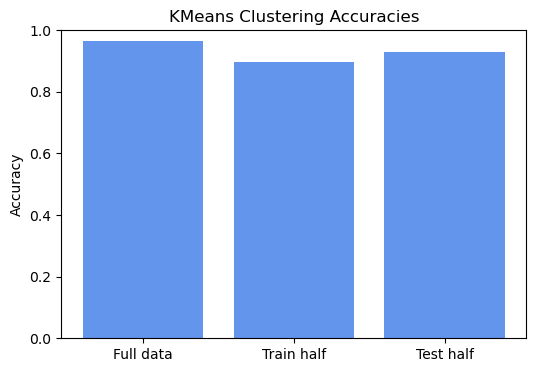

In [18]:
#Make graph
accuracies = [accuracy_full, accuracy_train, accuracy_test]
labels_bar = ['Full data', 'Train half', 'Test half']

plt.figure(figsize=(6,4))
plt.bar(labels_bar, accuracies, color='#6495ED')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.title('KMeans Clustering Accuracies')
plt.show()

### Implementations

# Rodolfo Ismael Cabrera Silva

We tried to identify the top 10 genes that are upregulated on the AC and SCC subtypes.

To identified them, we need to translate the probe_ID to genes.
Then, we need to perform log2 Fold Change to find the most upregulated and wilcoxon rank-sum test to identified statistically significant genes.


To avoid adding the need to install new packages, log2Fold Change and wilcoxon rank-sum test will be performed using numpy and scipy.

Afterwards, we took the top 10 statistically significant genes for each subtypes and z-score normalized their values across genes to visualize their changes in a cluster heatmap.

<Figure size 1800x1500 with 0 Axes>

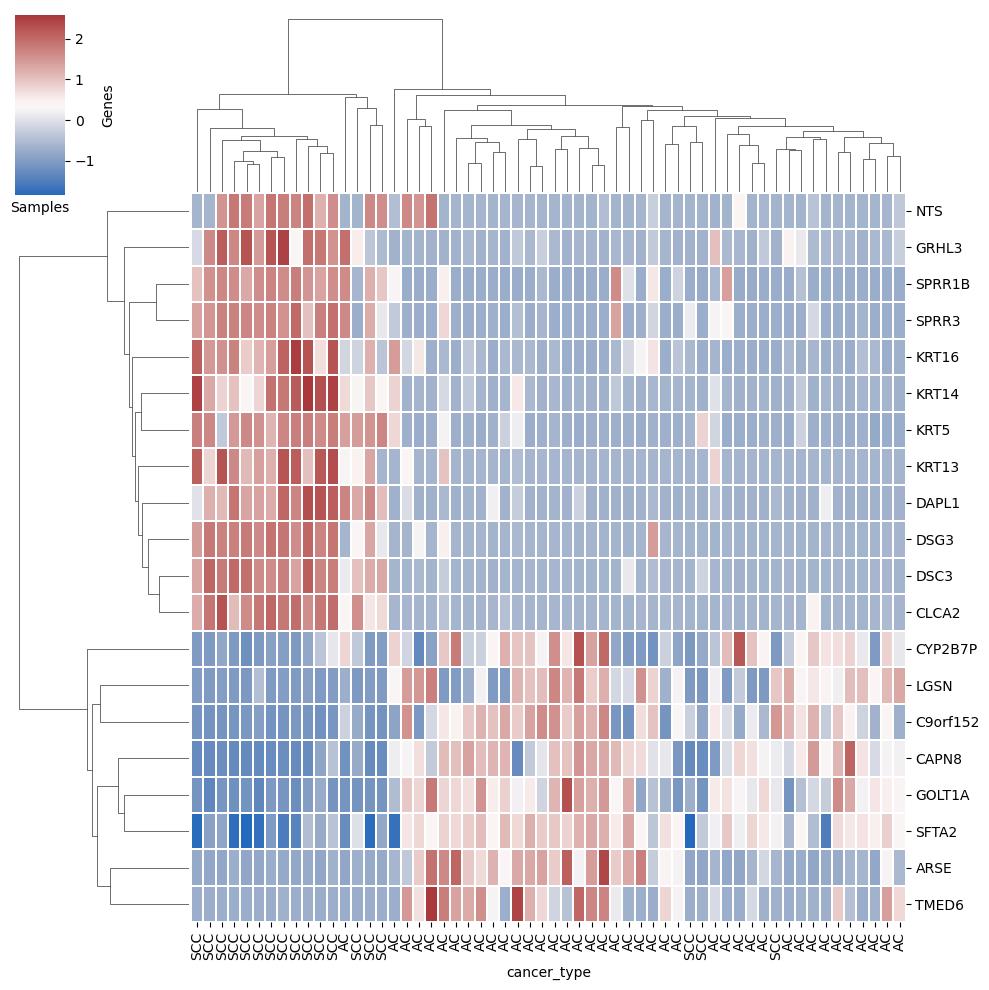

In [19]:
# Import extra dependencies
from scipy import stats # obtaining the statistical to calculate p-values with wilcoxon test
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Re-running the data loading function to get fresh dataframes
matrix, labels = load_project_data(geo_accession = "GSE10245", 
                                     silent=True) # Adding silent argument to reduced output message

# Obtaining platform information to translate probe IDs to gene symbols
gpl = geo.get_GEO(geo="GPL570")
dataframe = gpl.table.copy() # copying dataframe to avoid SettingWithCopyWarning

dataframe = dataframe[['ID', 'Gene Symbol']]
# Renaming the ID column to match with expression matrix
dataframe.rename(columns={'ID': 'ID_REF'}, inplace=True)

# Reorganizing the expression matrix to have probe IDs as column for merging
matrix_T = matrix.T.reset_index()

# Merging both datafreames to have gene symbols
merged_df = pd.merge(matrix_T, dataframe, on='ID_REF', how='left')

# Cleaning the 'Gene Symbol' column to keep only the first gene symbol in case of multiple symbols
merged_df['Gene Symbol'] = merged_df['Gene Symbol'].str.split(" /// ").str[0]

# Removing rows with missing gene symbols
merged_df.dropna(subset=['Gene Symbol'], inplace=True)
# Dropping probe ID column
merged_df.drop(columns=['ID_REF'], inplace=True)
# Some rows have duplicated gene symbols, we will average their expression values
merged_df = merged_df.groupby('Gene Symbol').mean()
# Obtaining samples for each cancer subtype
ac_samples = labels[labels['cancer_type'] == 'AC'].reset_index()['index']
scc_samples = labels[labels['cancer_type'] == 'SCC'].reset_index()['index']
# Creating subset databframes for each cancer subtype
ac_df = merged_df[ac_samples]
scc_df = merged_df[scc_samples]


# Creating a results dataframe with log2 fold change and p-values
results_df = pd.DataFrame({
    # Getting the log2 fold change between the two cancer subtypes for each gene
    'log2_FC': np.log2(ac_df.mean(axis=1) / scc_df.mean(axis=1)),
    # Getting the p-values using Wilcoxon rank-sum test
    'p_value': stats.ranksums(ac_df, scc_df, axis=1).pvalue
})

# Filtering significant genes with p-value < 0.05 and absolute log2 fold change > 1
significant_genes = results_df[(results_df['p_value'] < 0.05) & (results_df['log2_FC'].abs() > 1)].copy() # copying dataframe to avoid SettingWithCopyWarning

# Sorting by log2fold change in a descending order
significant_genes.sort_values(by='log2_FC', inplace=True,  ascending=False)

# Taking top 10 upregulated and downregulated genes and keeping only the gene symbols
upregulated_genes = significant_genes.head(10).reset_index()['Gene Symbol']
downregulated_genes = significant_genes.tail(10).reset_index()['Gene Symbol']

# Combining all the genes symbols in a single list
genes = pd.concat([upregulated_genes, downregulated_genes]).tolist()

# Keeping only the significant genes in the merged dataframe
heatmap_data = merged_df.loc[genes]
# Using the StandardScaler to normalize the data
scaler = StandardScaler()
# z-score normalization across genes
# Genes are rows and StandardScaler works across columns, Transposing to do z-sccore and then returning to original format 
heatmap_data = pd.DataFrame(scaler.fit_transform(heatmap_data.T).T,
                            index=heatmap_data.index, 
                            columns=heatmap_data.columns)

# Combining the heatmap with the labels dataframe to obtain subtype information
# Splitting the steps in different lines for better readability, but keeping pandorable chaining style
heatmap_data = (pd
                .merge(heatmap_data.T, labels, left_index=True, right_index=True, how='inner', validate ="1:1") # To merge the dataframes, we need to transpose the heatmap data
                .set_index('cancer_type') # adding subtype as index
                .drop("integer_label", axis=1) # Remove integer label column
                .T # Transposing back to original format
)

# Visualizing the results on a heatmap
plt.figure(figsize=(18, 15))
sns.clustermap(heatmap_data, method='average', cmap='vlag', z_score=None, col_cluster=True, row_cluster=True, yticklabels = True, xticklabels = True, linewidth=0.01)
plt.xlabel('Samples')   
plt.ylabel('Genes')
plt.show()


### Interpretation
 This data shows that the SCC cancer subtype has a more homogenous expression of genes, in contrast to the AC subtype which has more variability in their gene expression.
 
 In addition, we identified one AC and 3 SCC samples that are clustering with the other subtype. We confirmed the GSM manually to the information on GEOBUS to ensure there was no labeling error.
 
 Samples were labeled AC and SCC based on histopathological findings. This same finding was reported by the authors of the paper. However, the paper does not address how these information could aid 
 the proper classification of all tumor. 
 
Some of the markers that are present in most SCC are several Keratin proteins. Immunohistochemistry of several proteins has been used frequently in skins tumors [https://onlinelibrary.wiley.com/doi/10.1111/j.1600-0625.2009.01006.x]. 
 
 This provides a clinically available method to ensure classification in cases in which there is doubt on the histopathological diagnosis or if the diagnosis is uncertain. 

# Garrett Hill

To identify commonalities of genes that were specifically enriched in one type of cancer over the other, this code employs GO-term enrichment analysis to return a list of GO terms that are enriched in genes that are differentially expressed between the two cancers. 

In [20]:
!pip install gprofiler-official

In [21]:
import numpy as np
from scipy.stats import ttest_ind
import pandas as pd

In [22]:
#Original expression matrix uses probe IDs, I need to turn that into gene symbols. AI Tools used in the generation of this code.

#Get platform annotation
gpl = geo_df.gpls[list(geo_df.gpls.keys())[0]]
annot = gpl.table[['ID', 'Gene Symbol']].rename(columns={
    'ID': 'probe',
    'Gene Symbol': 'gene'
})
annot = annot.dropna(subset=['gene'])

#Convert matrix
mat_probes = matrix.T
mat_probes['probe'] = mat_probes.index

#Merge expression data with gene symbols
mat_merged = mat_probes.merge(annot, on='probe')
mat_merged = mat_merged.dropna(subset=['gene'])

#Averaging probes for genes with multiple probes
num_cols = [c for c in mat_merged.columns if c not in ['probe', 'gene']]

mat_genes = mat_merged.groupby('gene')[num_cols].mean()

#Final matrix
matrix_genes = mat_genes.T

In [23]:
#Extract out the expression matrix for each cancer subtype
ad_expr = matrix_genes.loc[labels['cancer_type'] == 'AC']
scc_expr = matrix_genes.loc[labels['cancer_type'] == 'SCC']

In [24]:
#Perform t-test per gene, put into a data frame
tvals, pvals = ttest_ind(ad_expr, scc_expr, axis=0)
de_results = pd.DataFrame({
    'gene': matrix_genes.columns,
    'pvalue': pvals,
    'tvalue': tvals
})

In [25]:
#Add mean expression
de_results['mean_AD']  = ad_expr.mean(axis=0).values
de_results['mean_SCC'] = scc_expr.mean(axis=0).values
de_results['logFC']    = de_results['mean_AD'] - de_results['mean_SCC']

In [26]:
#Determine direction
de_results['logFC'] = de_results['mean_AD'] - de_results['mean_SCC']

#Pick differentially expressed genes
ad_up = (
    de_results[de_results['logFC'] > 0]
    .nsmallest(200, 'pvalue')['gene']
    .tolist()
)

scc_up = (
    de_results[de_results['logFC'] < 0]
    .nsmallest(200, 'pvalue')['gene']
    .tolist()
)

In [27]:
from gprofiler import GProfiler
gp = GProfiler(return_dataframe=True)

In [28]:
#Enriched in AD
go_ad = gp.profile(organism='hsapiens',
                   query=ad_up,
                   sources=['GO:BP']
                  )

In [29]:
#Enriched in SCC
go_scc = gp.profile(organism='hsapiens',
                   query=scc_up,
                   sources=['GO:BP']
                  )

In [30]:
import matplotlib.pyplot as plt

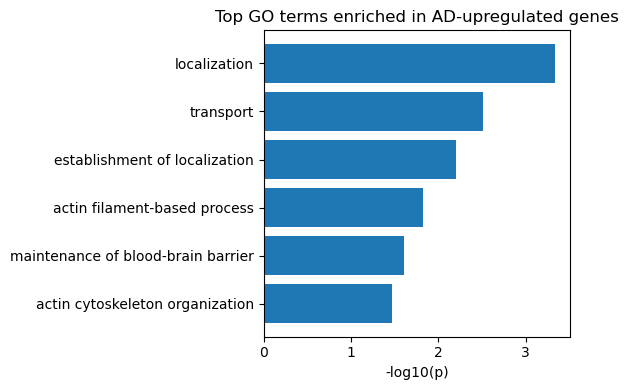

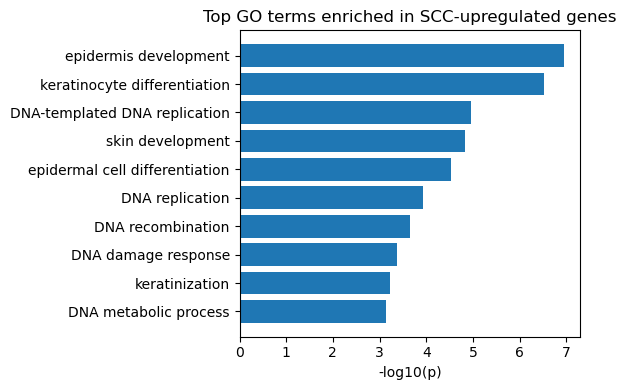

In [31]:
#plot
def plot_go(df, title):
    top = df.sort_values('p_value').head(10)
    plt.figure(figsize=(6,4))
    plt.barh(top['name'], -np.log10(top['p_value']))
    plt.xlabel('-log10(p)')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_go(go_ad, "Top GO terms enriched in AD-upregulated genes")
plot_go(go_scc, "Top GO terms enriched in SCC-upregulated genes")

### Interpretation

When examining the terms enriched in SCC-upregulated genes, we observe many genes involving skin cells. This includes skin cell development, differentiation, and keratinization. Additionally, we see many terms typical of cancer, such as DNA replication and DNA metabolic process. Because SCC arises from squamous cells, a type of skin cell, it makes sense that many genes involved in skin cell-dependent processes would be enriched in this cancer.

The GO terms enriched in the AD-upregulated genes were generally involved in transport. These include terms like localization, transport, and establishment of localization. AD cancer generally arises in glandular tissue. Perhaps because this cancer arises in glandular tissue, there are defects in the localization/transport of these cells that allow them to re-locate and grow uncontrolled in the lung, past the bounds of the glandular tissue. 

This analysis reveals that specifically enriched GO terms may suggest unique drivers of these two cancers, and such terms align with the cancer's original cells of origin.

# Vital Nyabashi
### Implementation
Question: Was the data split correctly? Do train and test have similar distributions?

In [36]:
# I want to check if the genes in my train set and test set have similar values
# If they're very different, maybe I split the data wrong

# First, let me pick some genes to check
# I'll use the genes that vary the most between samples
variances = X_full.var(axis=0)  # Calculate variance for each gene
variances_sorted = variances.sort_values(ascending=False)  # Sort them
top_genes = variances_sorted.head(10).index  # Take top 10

print(f"\nI'm checking the top 10 most variable genes")
print(f"Train set has {len(X_train)} samples")
print(f"Test set has {len(X_test)} samples\n")

# Compare the mean expression of these genes in train vs test
print("Comparing average gene expression:")
print("-"*60)
print(f"{'Gene':<30} {'Train Avg':<12} {'Test Avg':<12}")
print("-"*60)

for gene in top_genes:
    train_avg = X_train[gene].mean()
    test_avg = X_test[gene].mean()
    print(f"{gene:<30} {train_avg:<12.2f} {test_avg:<12.2f}")



I'm checking the top 10 most variable genes
Train set has 29 samples
Test set has 29 samples

Comparing average gene expression:
------------------------------------------------------------
Gene                           Train Avg    Test Avg    
------------------------------------------------------------
201820_at                      4.58         6.35        
209125_at                      6.73         7.07        
206291_at                      4.92         5.30        
211735_x_at                    7.18         6.65        
205982_x_at                    7.62         7.16        
202831_at                      6.71         8.09        
38691_s_at                     8.51         8.07        
205064_at                      4.92         5.93        
224588_at                      5.86         4.32        
220542_s_at                    6.05         6.83        


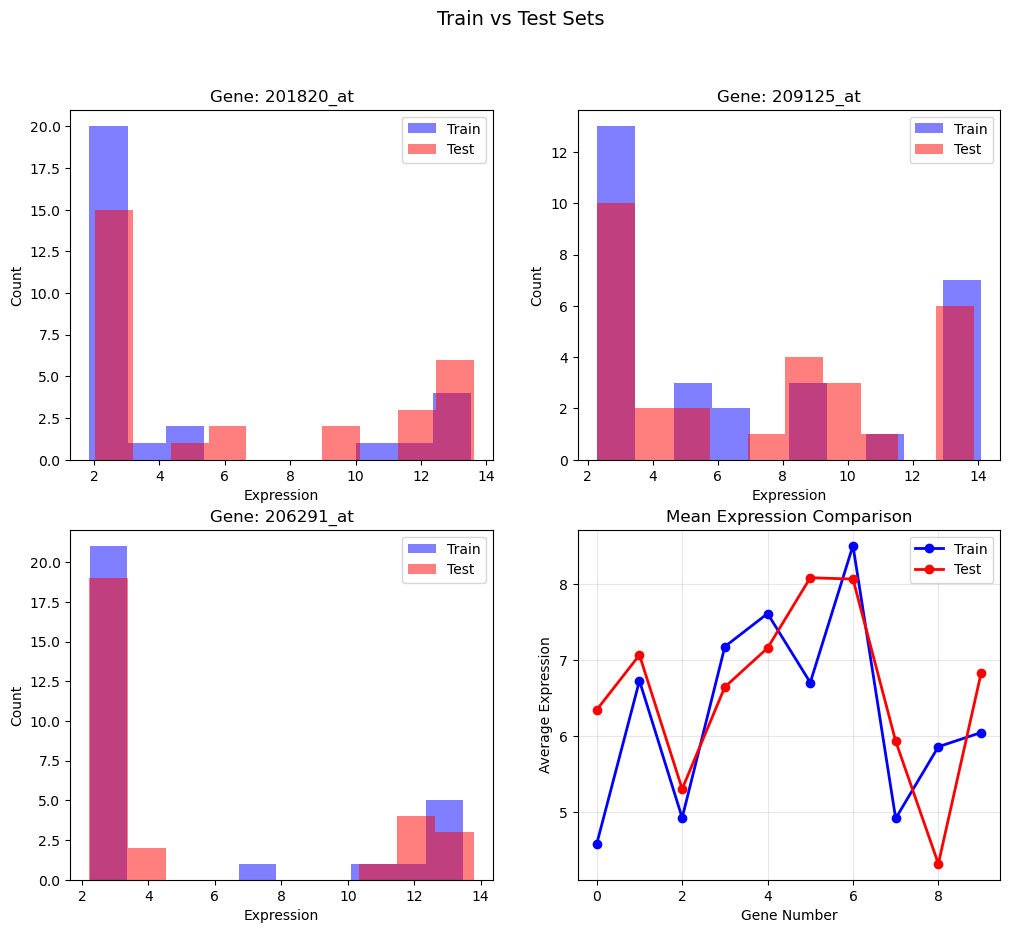

In [33]:
# Make some simple plots to visualize this
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Train vs Test Sets", fontsize=14)

# Plot 1: Histogram for first gene
gene1 = top_genes[0]
axes[0, 0].hist(X_train[gene1], bins=10, alpha=0.5, label='Train', color='blue')
axes[0, 0].hist(X_test[gene1], bins=10, alpha=0.5, label='Test', color='red')
axes[0, 0].set_title(f'Gene: {gene1}')
axes[0, 0].set_xlabel('Expression')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend()

# Plot 2: Histogram for second gene
gene2 = top_genes[1]
axes[0, 1].hist(X_train[gene2], bins=10, alpha=0.5, label='Train', color='blue')
axes[0, 1].hist(X_test[gene2], bins=10, alpha=0.5, label='Test', color='red')
axes[0, 1].set_title(f'Gene: {gene2}')
axes[0, 1].set_xlabel('Expression')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend()

# Plot 3: Histogram for third gene
gene3 = top_genes[2]
axes[1, 0].hist(X_train[gene3], bins=10, alpha=0.5, label='Train', color='blue')
axes[1, 0].hist(X_test[gene3], bins=10, alpha=0.5, label='Test', color='red')
axes[1, 0].set_title(f'Gene: {gene3}')
axes[1, 0].set_xlabel('Expression')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend()

# Plot 4: Compare means across all 10 genes
train_means = [X_train[g].mean() for g in top_genes]
test_means = [X_test[g].mean() for g in top_genes]
x_positions = range(len(top_genes))

axes[1, 1].plot(x_positions, train_means, 'o-', label='Train', color='blue', linewidth=2)
axes[1, 1].plot(x_positions, test_means, 'o-', label='Test', color='red', linewidth=2)
axes[1, 1].set_title('Mean Expression Comparison')
axes[1, 1].set_xlabel('Gene Number')
axes[1, 1].set_ylabel('Average Expression')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)



In [34]:
# Calculate how similar the means are
differences = []
for gene in top_genes:
    diff = abs(X_train[gene].mean() - X_test[gene].mean())
    differences.append(diff)

avg_difference = sum(differences) / len(differences)
print(f"Average difference between train and test means: {avg_difference}")

Average difference between train and test means: 0.8636838914448276


### Conclusion
The train and test sets look similar.
  The train and test sets are reasonably similar in distribution, both for individual genes and overall mean expression.
  Small differences exist in certain expression ranges, but there is no major mismatch, suggesting that the train and test sets are representative of each other and appropriate for model training and evaluation.

Why this matters for biology:
  - If train/test are similar, our clustering accuracy is trustworthy
  - It means we didn't accidentally put all the 'easy' samples in one set
  - The gene expression patterns are preserved in both sets
  - This validates that our 96.5% accuracy represents true model performance